In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = np.load('/lmh_data/data/sclab/sclab/AD/eval_dataset.npy', allow_pickle=True)

[[8, 14, 7, 1, 3, 4, 3, 8, 10, 14, 1, 1, 4, 5, 12, 13, 2, 2, 3, 10], [5, 1, 0, 3, 12, 1, 2, 30, 0, 1, 2, 2, 2, 1, 9, 2, 0, 2, 1, 4]]


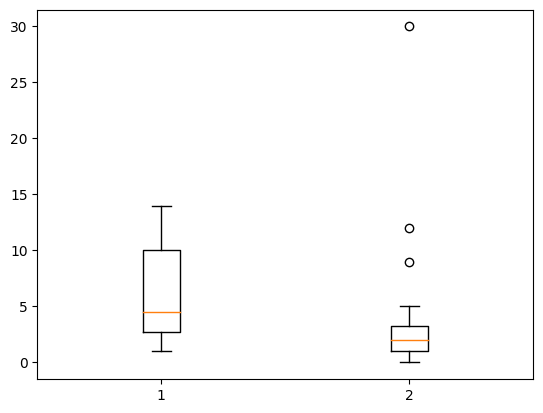

In [134]:
gene_name = 'APP'

exps = [[], []]
for d in dataset:
    exp = d['scRNA'][np.where(d['scRNA_head']==gene_name)[0][0]]
    if d['Diagnosis'] == 'AD':
        exps[1].append(exp)
    else:
        exps[0].append(exp)

print(exps)
plt.boxplot(exps)
plt.show()

In [122]:
gene_names = ["RAB8B", "FAM209A", "APH1B", "APP", "USP8", "TLK2", "CTSW", "FIBP", "CCDC85B", "NOP58", "GNGT2", "ABI3", "TRIM4", "BMPR2", "OR5A2", "TREML1", "TAS2R60", "TAS2R41", "ZNF652", "AZGP1", "ACE", "ZKSCAN1", "TREM2", "PRL", "MVP", "ICA1L", "GIF", "MS4A3", "MS4A2", "MS4A6A", "ZNF3", "POLR2M", "MS4A4E", "COPS6", "ALDH1A2", "MS4A6E", "DYRK3", "MAPKAPK2", "UBE2G1", "TDRD6", "TMEM219", "CARF", "TAOK2", "PIGR", "SPNS3", "SLTM", "PFKFB2", "KCNN4", "MYO1E", "ANKRD66", "CD55", "DOC2A", "C16orf92", "FAM57B", "CR1", "NBEAL1", "CR1L", "AP4M1", "YPEL3", "AP1AR", "PVR", "CEACAM19", "CEACAM16", "BCL3", "CBLC", "BCAM", "PVRL2", "TOMM40", "APOE", "APOC1", "APOC4-APOC2", "APOC4", "APOC2", "CLPTM1", "LAMTOR4", "RELB", "CLASRP", "GAL3ST4", "MED11", "GPC2", "ZNF296", "GEMIN7", "MARK4", "TLN2", "MAMSTR", "PPP1R37", "NKPD1", "CKM", "STAG3", "ZNF764", "ZNF688", "AARS", "PRR14", "BIN1", "TM4SF5", "KLC3", "PSMB6", "ERCC2", "PPP1R13L", "SPRED1", "ERCC1", "RNF40", "PVRIG", "ZNF629", "SETD1A", "HSD3B7", "STX4", "PILRA", "ECEL1", "IL34", "C19orf83", "ZNF668", "ZNF646", "VAC14", "USP6NL", "QPCTL", "PRSS53", "CHRNE", "VKORC1", "GP1BA", "BCKDK", "KAT8", "EFHD1", "NYAP1", "DMWD", "RSPH6A", "PYCARD", "TMEM63A", "PYCR2", "ZNF843", "CAMTA2", "RASGEF1B", "INPP5D", "INCA1", "ZFP3", "ZNF232", "RNF43", "USP6", "BICC1", "SCIMP", "TMEM106B", "NUP88", "AJUBA", "ECSCR", "TRIM35", "TMEM259", "CNN2", "PTK2B", "ABCA7", "HMHA1", "EPHX2", "CLU", "RGS14", "SORL1", "DAZAP1", "CD33", "SRA1", "EIF4EBP3", "APBB3", "GALNT10", "ZNF841", "SAMHD1", "PSMC3", "VSTM2L", "NDUFS3", "PICALM", "LGALS16", "SLC24A4", "SH2D5", "EIF4G3", "ARPC1A", "ZNF394", "ZKSCAN5", "FAM200A", "ZNF655", "KLHDC9", "DEDD", "ADAMTS4", "FCER1G", "APOA2", "KIF21B"]
for gene_name in gene_names:
    exps = [[], []]
    for d in dataset:
        _where = np.where(d['scRNA_head']==gene_name)[0]
        if len(_where) == 0:
            continue
        exp = d['scRNA'][_where[0]]
        if d['Diagnosis'] == 'AD':
            exps[1].append(exp)
        else:
            exps[0].append(exp)
    exps = np.array(exps)
    _mean = exps.mean(axis=1)
    if _mean[0] < 0.5 and _mean[1] < 0.5:
        continue
    print('{}: {}'.format(gene_name, exps))
    

APP: [[0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1]
 [1 1 0 0 2 0 0 2 0 1 0 0 1 0 0 1 0 1 0 1]]
BMPR2: [[1 1 1 1 1 1 0 0 0 4 0 1 0 1 2 0 0 1 0 1]
 [1 2 0 0 1 0 0 0 2 0 0 0 2 0 1 0 0 0 0 0]]
ZKSCAN1: [[1 0 0 0 0 0 2 1 0 1 1 0 0 0 0 2 1 2 1 1]
 [2 0 0 1 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]
SLTM: [[0 0 0 1 0 0 1 0 1 0 1 0 0 2 1 1 0 1 0 1]
 [1 3 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3]]
PFKFB2: [[0 9 0 0 0 0 0 1 0 2 0 0 0 2 1 0 1 0 2 3]
 [0 0 0 1 0 2 0 0 0 0 0 2 0 0 1 1 0 0 0 1]]
NBEAL1: [[0 0 1 0 0 0 0 1 0 0 2 0 1 1 2 0 0 1 1 0]
 [0 0 1 0 1 0 0 1 0 0 0 2 0 0 1 2 0 1 0 1]]
APOE: [[13  6  0  1  2  0  3  2  4  0  0  1  5  3  1  1  1  7  2  1]
 [ 2  0  2  1  4  0  1  0  0  0  2  0  0  1  3  2  1  0  2  3]]
SPRED1: [[0 0 1 6 1 0 1 1 1 0 0 5 3 2 3 1 1 2 2 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 3]]
C19orf83: []


/tmp/ipykernel_79417/1813923021.py:14: RuntimeWarning: Mean of empty slice.
  _mean = exps.mean(axis=1)
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


CLU: [[ 8 14  7  1  3  4  3  8 10 14  1  1  4  5 12 13  2  2  3 10]
 [ 5  1  0  3 12  1  2 30  0  1  2  2  2  1  9  2  0  2  1  4]]
SORL1: [[1 3 1 0 1 0 1 1 3 1 0 0 2 1 0 1 0 1 0 1]
 [0 1 0 1 1 2 0 1 0 0 1 1 0 0 3 0 0 0 2 4]]
PICALM: [[0 0 1 0 1 1 1 1 1 2 0 0 1 1 0 1 0 0 0 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1]]
SLC24A4: [[4 1 0 0 0 0 0 0 2 1 0 1 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 9 0 0 0 0 0 1 0 0 0 0 0 0]]
EIF4G3: [[0 0 1 0 2 2 0 1 1 1 1 2 1 1 1 0 3 4 2 1]
 [0 1 1 1 1 0 0 4 1 0 0 0 1 1 1 0 4 0 0 4]]


In [ ]:
gene_name = 'BIN1'

exps = []
for d in np.load('/lmh_data/data/sclab/sclab/train_dataset.npy', allow_pickle=True):
    if d['cell_type'] != 'ODC':
        continue
    exp = d['scRNA'][np.where(d['scRNA_head']==gene_name)[0][0]]
    exps.append(exp)
exps = np.array(exps)
# exps[exps>0].shape
plt.boxplot(exps)